In [1]:
###### importing dependencies #############################################
import pprint
import seaborn as sns
import cryptoaml.datareader as cdr
from collections import OrderedDict
from cryptoaml.metrics import results_table 
from cryptoaml.models import RandomForestAlgo, XgboostAlgo, LightGbmAlgo, CatBoostAlgo

/home/delinvas/anaconda3/envs/btc-classifier/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# models without tuning 
elliptic = cdr.get_data("elliptic")
elliptic_sets = elliptic.train_test_split(train_size=0.7, 
                                          feat_set=["LF", "AF"], 
                                          inc_meta=False)

In [3]:
# models with default parameters  
models_default = OrderedDict()

rf_default = RandomForestAlgo(n_jobs=-1, n_estimators=50, max_features=50)
models_default[rf_default.model_name_] = rf_default

# Using the default values for XGBoost Classifier will obtain reproducable results 
# => 'gblinear' booster with shotgun updater is nondeterministic as it uses Hogwild algorithm [Default='gbtree']
# =>  parameters such as subsample and colsample_by_* are set to 1, meaning no random sampling will be used 
xgb_default = XgboostAlgo(n_jobs=-1)
models_default[xgb_default.model_name_] = xgb_default

light_default = LightGbmAlgo(n_jobs=-1)
models_default[light_default.model_name_] = light_default

cat_default = CatBoostAlgo(thread_count=-1, verbose=False)
models_default[cat_default.model_name_] = cat_default

In [4]:
# extract results for elliptic dataset on different feature sets

results = OrderedDict()
results["elliptic"] = OrderedDict()
metrics=["precision", "recall", "f1", "f1_micro", "confusion"]

#extracting dataset results 
for model_key, model in models_default.items():
    print("\n######################################################")
    print("Elliptic Dataset - Feature Set [{0}] ".format(model_key))
    print("######################################################")
    results["elliptic"][model_key] = OrderedDict()
        
    for feature_set, feature_set_data in elliptic_sets.items():
        print("- Training & Extracting Results - Feature Set [{}]".format(feature_set))

        if feature_set not in results["elliptic"][model_key]:
            results["elliptic"][model_key][feature_set] = OrderedDict()

        # train model with default parameters
        tmp_train_X = feature_set_data.train_X
        tmp_train_y = feature_set_data.train_y 
        model.fit(tmp_train_X, tmp_train_y)

        # extract results 
        tmp_test_X = feature_set_data.test_X
        tmp_test_y = feature_set_data.test_y
        tmp_result = model.evaluate(metrics=metrics,
                                    X=tmp_test_X, 
                                    y=tmp_test_y)


        print(pprint.pformat(tmp_result))
        print(pprint.pformat(model.get_params()))
        results["elliptic"][model_key][feature_set] = tmp_result        


######################################################
Elliptic Dataset - Feature Set [random_forest] 
######################################################
- Training & Extracting Results - Feature Set [LF]
OrderedDict([('precision', 0.8816091954022989),
             ('recall', 0.7082179132040628),
             ('f1', 0.785458269329237),
             ('f1_micro', 0.9748650269946011),
             ('confusion', array([[15484,   103],
       [  316,   767]]))])
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 50,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
- Training & Extracting Results - Feature Set [AF]
OrderedDict([('precision', 0.929845422116528),
   

In [5]:
# RF 
# 0.7801920161697827
# 0.8146214099216711

# 0.7828715365239295
# 0.8103626943005181

# XGBoost 
# 0.7794871794871795
# 0.7794871794871795

# 0.8026652998462326
# 0.8026652998462326

# Light 
# 0.7789580171977744
# 0.7789580171977744

# 0.813929313929314
# 0.813929313929314

# CAT 
# 0.7892004153686397
# 0.7892004153686397
# 0.7892004153686397

# 0.8187565858798735
# 0.8187565858798735
# 0.8187565858798735

In [6]:
# display results 
# print(results)
# models = [x[0] for x in results["elliptic"]["LF"].items()]
# f1_scores = [x["f1"] for x in results["elliptic"]["LF"].values()]

# print(f1_scores)
# ax = sns.barplot(x=models, y=f1_scores)
# ax.set(ylim=(0, 1))



In [7]:
# f1_scores = [x["f1"] for x in results["elliptic"]["AF"].values()]

# print(f1_scores)
# ax = sns.barplot(x=models, y=f1_scores)
# ax.set(ylim=(0, 1))

In [15]:
confusion_matrices = []

for x in results["elliptic"].values():
    for n in x.values():
        confusion_matrices.append(n["confusion"])

print(confusion_matrices)



[array([[15484,   103],
       [  316,   767]]), array([[15528,    59],
       [  301,   782]]), array([[15480,   107],
       [  323,   760]]), array([[15502,    85],
       [  300,   783]]), array([[15463,   124],
       [  313,   770]]), array([[15529,    58],
       [  300,   783]]), array([[15504,    83],
       [  323,   760]]), array([[15549,    38],
       [  306,   777]])]


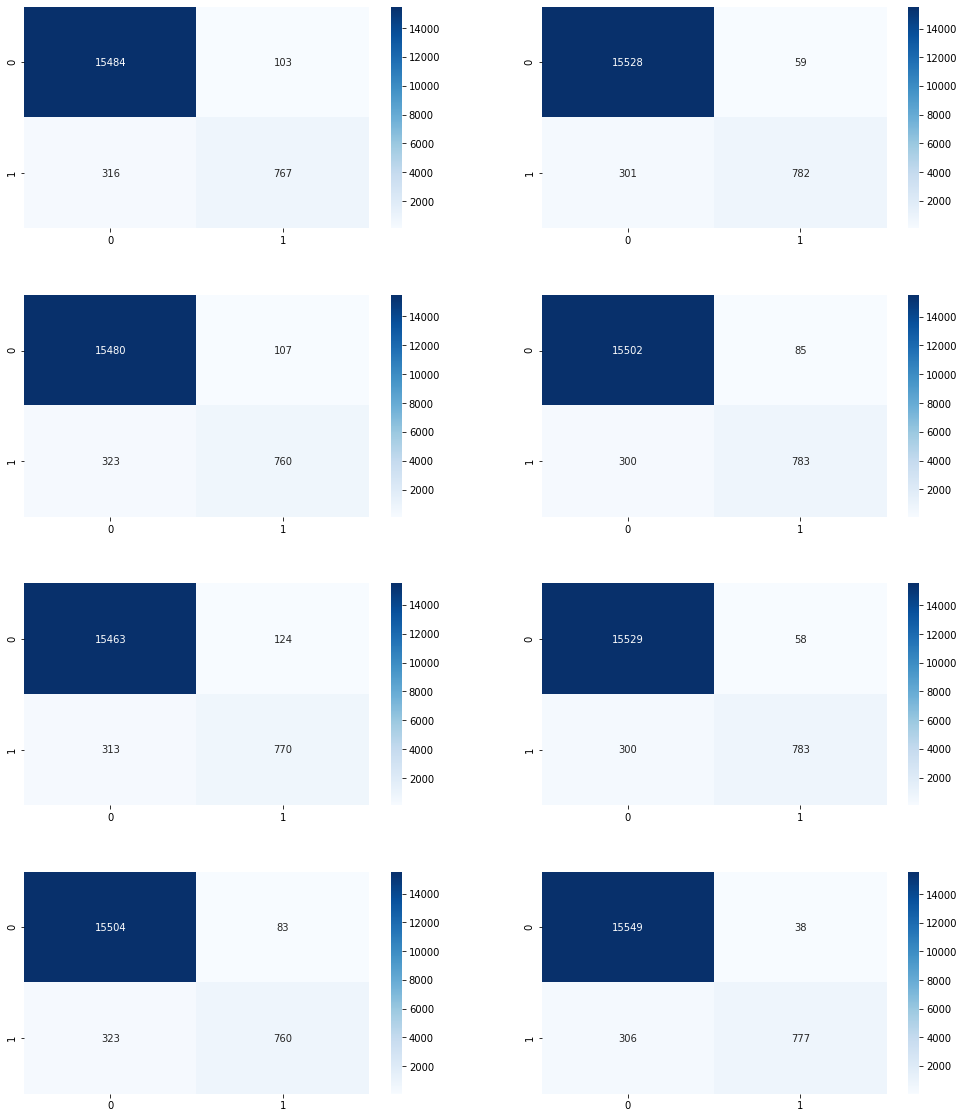

In [34]:
import matplotlib.pyplot as plt

def confusion_plt(data, title):
    ax = sns.heatmap(data, 
                     annot=True, 
                     cmap="Blues",  
                     fmt="g")
    ax.set_title(title)
    return ax

# confusion_plt(confusion_matrices[0], "test")


# fig = plt.figure(figsize=(17,15))
# fig.subplots_adjust(hspace=0.3, wspace=0.2)
# i = 1
# for x in confusion_matrix:
#     ax = fig.add_subplot(2, 2, i)
#     sns.set(font_scale=1.4) 
#     confusion_plt(x, "test")
#     i = i+1


def plot_confusion_matrix(matrices, figsize=(17,15), columns=2, hspace=0.3, wspace=0.2):
    
    total = len(matrices)
    if columns>total:
        columns = total
    
    rows = int(total/columns) 
    
    current_plot = 1
    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=hspace, wspace=wspace)  
    for m in matrices:
        ax = fig.add_subplot(rows, columns, current_plot)
        sns.heatmap(m, annot=True, cmap="Blues", fmt="g")
        current_plot+=1
       
        
plot_confusion_matrix(confusion_matrices, figsize=(17,20))

In [10]:
# a = confusion_plt(confusion_matrix[0], "test")
# b = confusion_plt(confusion_matrix[0], "test")
# c = confusion_plt(confusion_matrix[0], "test")
# d = confusion_plt(confusion_matrix[0], "test")


# ACCURARCY        = "accuracy"
# F1_BINARY        = "f1"
# F1_MICRO         = "f1_micro"
# RECALL_BINARY    = "recall"
# PRECISION_BINARY = "precision"

# results_table_metrics = {ACCURARCY, F1_BINARY, F1_MICRO, RECALL_BINARY, PRECISION_BINARY}

    
# results_tbl = results_table(results["elliptic"])
# display(results_tbl)
# display(results_tbl.sort_values("f1", ascending=False))

,model,precision,recall,f1,f1_micro
0,random_forest_LF,0.882,0.708,0.785,0.975
1,random_forest_AF,0.930,0.722,0.813,0.978
2,xg_boost_LF,0.877,0.702,0.779,0.974
3,xg_boost_AF,0.902,0.723,0.803,0.977
4,light_boost_LF,0.861,0.711,0.779,0.974
5,light_boost_AF,0.931,0.723,0.814,0.979
6,cat_boost_LF,0.902,0.702,0.789,0.976
7,cat_boost_AF,0.953,0.717,0.819,0.979


,model,precision,recall,f1,f1_micro
7,cat_boost_AF,0.953,0.717,0.819,0.979
5,light_boost_AF,0.931,0.723,0.814,0.979
1,random_forest_AF,0.930,0.722,0.813,0.978
3,xg_boost_AF,0.902,0.723,0.803,0.977
6,cat_boost_LF,0.902,0.702,0.789,0.976
0,random_forest_LF,0.882,0.708,0.785,0.975
2,xg_boost_LF,0.877,0.702,0.779,0.974
4,light_boost_LF,0.861,0.711,0.779,0.974


In [11]:
# fig = plt.figure(figsize=(17,15))
# fig.subplots_adjust(hspace=0.3, wspace=0.2)
# i = 1
# for x in confusion_matrix:
#     ax = fig.add_subplot(2, 2, i)
#     sns.set(font_scale=1.4) 
#     confusion_plt(x, "test")
#     i = i+1